## Foward Price Prediction Using Transformed DF Predicting P0

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

In [ ]:
from build_a_pipeline import build_pipeline_P0_foward_price
model_performance = []
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1')
x_val = x_val.sort_index(ascending=True)
y_val = y_val.sort_index(ascending=True)

## Ridge with Alpha 3

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=3)  
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': ridge_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})




Mean Squared Error: 1741.879604866463
Root Mean Squared Error: 41.73583118696048
Mean Absolute Error: 23.611981335321794
R-squared: 0.9359172999110141
Explained Variance Score: 0.935940350289723


## Ridge, Low Alpha

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': ridge_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})



Mean Squared Error: 1736.2182504588882
Root Mean Squared Error: 41.66795231900517
Mean Absolute Error: 24.054529198611586
R-squared: 0.9361255777251549
Explained Variance Score: 0.9361865404232518


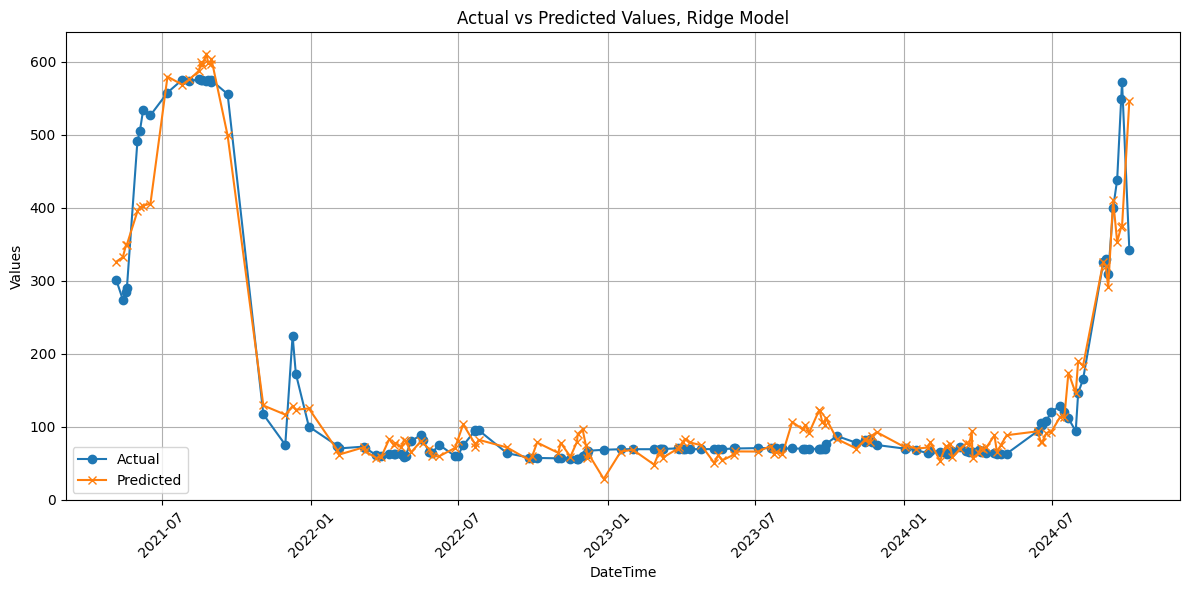

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Ridge Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Lasso with Low Alpha

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
explained_variance = explained_variance_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': lasso_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})

Mean Squared Error: 1727.2400925043278
Root Mean Squared Error: 41.560078109940164
Mean Absolute Error: 23.52725961570551
R-squared: 0.9364558787413367
Explained Variance Score: 0.9364752066706657


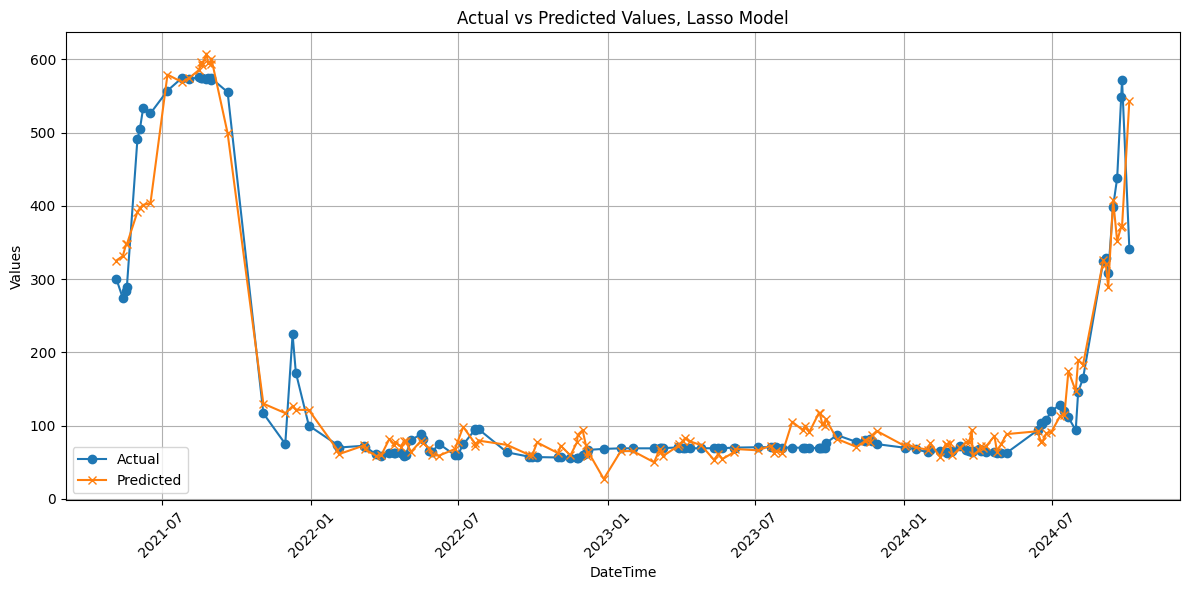

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Lasso Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Gradient Boosted

In [10]:
import xgboost as xgb
# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 221.30024307138333
Root Mean Squared Error: 14.87616358714112
Mean Squared Error: 221.30024307138333
Root Mean Squared Error: 14.87616358714112
R-squared: 0.9918584975294832


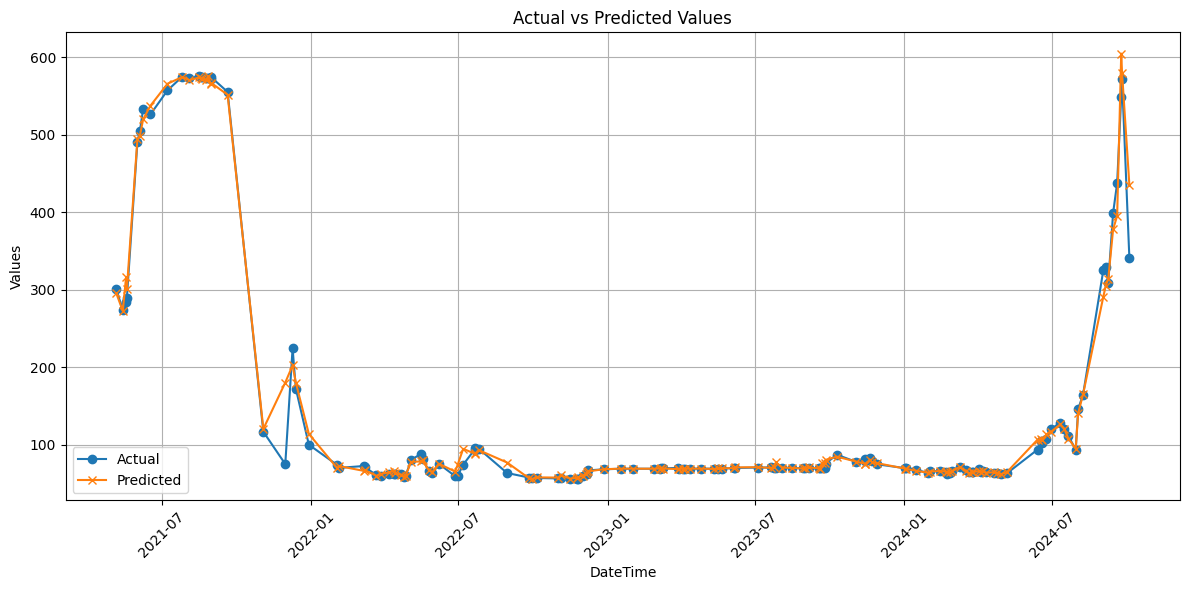

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [12]:
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by='Mean Squared Error', ascending=True)
performance_df

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-squared,Explained Variance Score
3,"XGBRegressor(base_score=None, booster=None, ca...",221.300243,14.876164,NaN,0.991858,NaN
2,Lasso(alpha=0.1),1727.240093,41.560078,23.527260,0.936456,0.936475
1,Ridge(alpha=0.1),1736.218250,41.667952,24.054529,0.936126,0.936187
0,Ridge(alpha=3),1741.879605,41.735831,23.611981,0.935917,0.935940
